In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import KFold

In [ ]:
df = pd.read_csv('B-train.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      180 non-null    float64
 1   x2      180 non-null    float64
 2   x3      181 non-null    float64
 3   x4      180 non-null    float64
 4   x5      181 non-null    float64
 5   x6      180 non-null    float64
 6   x7      180 non-null    float64
 7   x8      180 non-null    float64
 8   y       188 non-null    float64
dtypes: float64(9)
memory usage: 13.5 KB


In [ ]:
df = df.dropna(subset=['y'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 189
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      178 non-null    float64
 1   x2      179 non-null    float64
 2   x3      179 non-null    float64
 3   x4      178 non-null    float64
 4   x5      179 non-null    float64
 5   x6      178 non-null    float64
 6   x7      178 non-null    float64
 7   x8      178 non-null    float64
 8   y       188 non-null    float64
dtypes: float64(9)
memory usage: 14.7 KB


In [ ]:
a=0.05
b=0.95

-192.8375 171.78750000000008


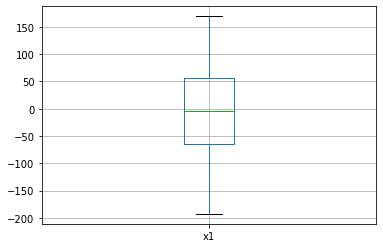

In [ ]:
low,high = df['x1'].quantile([a,b])
print(low,high)
df = df.drop(df.index[df['x1']<low])
df = df.drop(df.index[df['x1']>high])
df.boxplot(column='x1')

-182.366 163.74400000000003


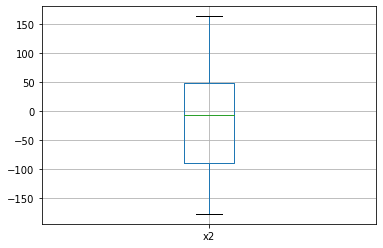

In [ ]:
low,high = df['x2'].quantile([a,b])
print(low,high)
df = df.drop(df.index[df['x2']<low])
df = df.drop(df.index[df['x2']>high])
df.boxplot(column='x2')

-21.572 14.759999999999991


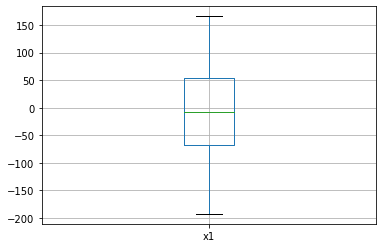

In [ ]:
low,high = df['x3'].quantile([a,b])
print(low,high)
df = df.drop(df.index[df['x3']<low])
df = df.drop(df.index[df['x3']>high])
df.boxplot(column='x1')

-16.444 17.076999999999995


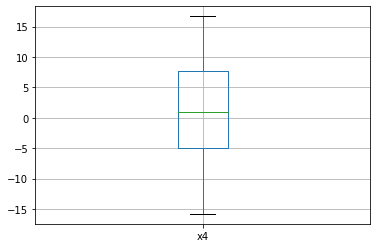

In [ ]:
low,high = df['x4'].quantile([a,b])
print(low,high)
df = df.drop(df.index[df['x4']<low])
df = df.drop(df.index[df['x4']>high])
df.boxplot(column='x4')

-21.1885 16.121999999999996


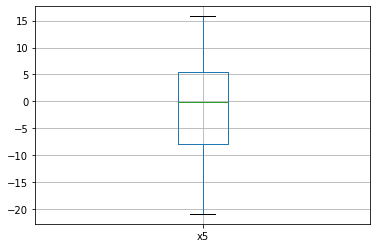

In [ ]:
low,high = df['x5'].quantile([a,b])
print(low,high)
df = df.drop(df.index[df['x5']<low])
df = df.drop(df.index[df['x5']>high])
df.boxplot(column='x5')

-13.36 17.45


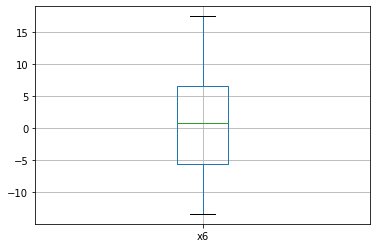

In [ ]:
low,high = df['x6'].quantile([a,b])
print(low,high)
df = df.drop(df.index[df['x6']<low])
df = df.drop(df.index[df['x6']>high])
df.boxplot(column='x6')

-177.1825 159.6575


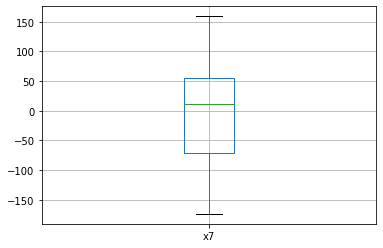

In [ ]:
low,high = df['x7'].quantile([a,b])
print(low,high)
df = df.drop(df.index[df['x7']<low])
df = df.drop(df.index[df['x7']>high])
df.boxplot(column='x7')

95.05550000000001 52132.26349999999


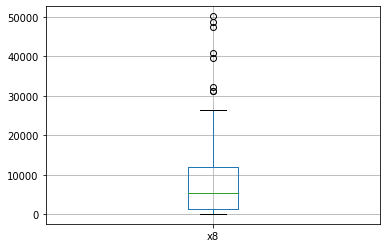

In [ ]:
low,high = df['x8'].quantile([a,b])
print(low,high)
df = df.drop(df.index[df['x8']<low])
df = df.drop(df.index[df['x8']>high])
df.boxplot(column='x8')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 3 to 188
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      75 non-null     float64
 1   x2      77 non-null     float64
 2   x3      76 non-null     float64
 3   x4      74 non-null     float64
 4   x5      77 non-null     float64
 5   x6      71 non-null     float64
 6   x7      76 non-null     float64
 7   x8      74 non-null     float64
 8   y       80 non-null     float64
dtypes: float64(9)
memory usage: 6.2 KB


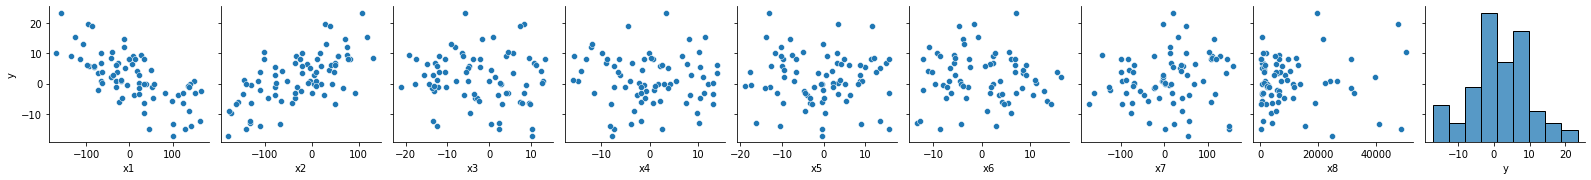

In [ ]:
sns.pairplot(df,x_vars=df.columns,y_vars=['y'])

In [ ]:
df.corr().sort_values('y')[['y']]

,y
x1,-0.691657
x3,-0.095890
x4,-0.053267
x5,-0.048840
x6,-0.033814
x8,0.022046
x7,0.127571
x2,0.643378
y,1.000000


In [ ]:
# df['x1'] = df['x1'].fillna(0)
# df['x2'] = df['x2'].fillna(0)
# df['x3'] = df['x3'].fillna(0)
# df['x4'] = df['x4'].fillna(0)
# df['x5'] = df['x5'].fillna(0)
# df['x6'] = df['x6'].fillna(0)
# df['x7'] = df['x7'].fillna(0)
# df['x8'] = df['x8'].fillna(0)

df['x1'] =df['x1'].fillna(df['x1'].mean())
df['x2'] =df['x2'].fillna(df['x2'].mean())
df['x3'] =df['x3'].fillna(df['x3'].mean())
df['x4'] =df['x4'].fillna(df['x4'].mean())
df['x5'] =df['x5'].fillna(df['x5'].mean())
df['x6'] =df['x6'].fillna(df['x6'].mean())
df['x7'] =df['x7'].fillna(df['x7'].mean())
df['x8'] =df['x8'].fillna(df['x8'].mean())

# df = df.dropna()

X=df[['x1','x2','x3','x4','x5','x6','x7','x8']]
y=df['y']
#0             default 4.531383024420028
#mean       default 4.486311906106653
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
lm = LinearRegression()
lm.fit(X_scaled,y)
y_pred = lm.predict(X_scaled)
rmse = metrics.mean_squared_error(y,y_pred,squared=False)
print(rmse)
mape = np.mean(np.abs((y-y_pred)/y))*100
mape

4.486311906106653


inf

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 3 to 188
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      80 non-null     float64
 1   x2      80 non-null     float64
 2   x3      80 non-null     float64
 3   x4      80 non-null     float64
 4   x5      80 non-null     float64
 5   x6      80 non-null     float64
 6   x7      80 non-null     float64
 7   x8      80 non-null     float64
 8   y       80 non-null     float64
dtypes: float64(9)
memory usage: 6.2 KB


In [ ]:
rmse=[]
mape=[]
mae=[]
X=df[['x1','x2','x3','x6']]
# ตัด8,5,4,7(mean)
# 4.98651487394665
# 4.139833064021582
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
for train_index,test_index in kf.split(X):
  X_train = X.iloc[train_index]
  X_test = X.iloc[test_index]
  y_train = y.iloc[train_index]
  y_test = y.iloc[test_index]

  lm = LinearRegression()
  lm.fit(X_train,y_train)
  y_pred = lm.predict(X_test)
  rmse.append(metrics.mean_squared_error(y_test,y_pred,squared=False))
  mape.append(np.mean(np.abs((y_test-y_pred)/y))*100)
  mae.append(np.mean(np.abs(y_test-y_pred)))
print(np.mean(rmse))
print(np.mean(mape))
print(np.mean(mae))

4.98651487394665
inf
4.139833064021582


In [ ]:
rmse=[]
mape=[]
mae=[]
X=df[['x1','x2','x3']]
# ตัด8,7,6,5,4(fill0)
# 5.032396466098031
# 4.151214203051654
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
for train_index,test_index in kf.split(X):
  X_train = X.iloc[train_index]
  X_test = X.iloc[test_index]
  y_train = y.iloc[train_index]
  y_test = y.iloc[test_index]

  lm = LinearRegression()
  lm.fit(X_train,y_train)
  y_pred = lm.predict(X_test)
  rmse.append(metrics.mean_squared_error(y_test,y_pred,squared=False))
  mape.append(np.mean(np.abs((y_test-y_pred)/y))*100)
  mae.append(np.mean(np.abs(y_test-y_pred)))
print(np.mean(rmse))
print(np.mean(mape))
print(np.mean(mae))

4.988895743949629
inf
4.142488397665355


In [ ]:
X_train ,X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
lm=LinearRegression()
lm.fit(X_train,y_train)
y_pred=lm.predict(X_test)
rmse = metrics.mean_squared_error(y_pred,y_test,squared=False)
print(rmse)
mape = np.mean(np.abs((y_test - y_pred)/y))*100
mape

3.4761422788463463


147.02087830546452